# 引力场建模

In [37]:
import numpy as np
import matplotlib.pyplot as plt


def plot_vector_field(f, xmin, xmax, ymin, ymax, xstep=1, ystep=1):
    """
    在二维平面绘制向量场
    Draw a vector field on a 2D plane

    参数 (Parameters):
        f: function - 向量场函数，接收 (x,y) 并返回向量 [u,v]
                      (vector field function that takes (x,y) and returns [u,v])
        xmin: float - x轴最小值 (minimum x-axis value)
        xmax: float - x轴最大值 (maximum x-axis value)
        ymin: float - y轴最小值 (minimum y-axis value)
        ymax: float - y轴最大值 (maximum y-axis value)
        xstep: float - x轴步长 (x-axis step size)
        ystep: float - y轴步长 (y-axis step size)

    返回 (Returns):
        fig: matplotlib.figure.Figure - 图形对象 (figure object)
        ax: matplotlib.axes.Axes - 坐标轴对象 (axes object)
    """
    # 创建图形和坐标轴对象
    # Create figure and axes objects
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111)

    # 生成网格点
    # Generate grid points
    X, Y = np.meshgrid(np.arange(xmin, xmax, xstep), np.arange(ymin, ymax, ystep))

    # 计算向量场的分量
    # Calculate vector field components
    U = np.vectorize(lambda x, y: f(x, y)[0])(X, Y)
    V = np.vectorize(lambda x, y: f(x, y)[1])(X, Y)

    # 绘制向量场
    # Plot vector field
    ax.quiver(X, Y, U, V, color='red')

    # 返回图形和坐标轴对象
    # Return figure and axes objects
    return fig, ax

(<Figure size 700x700 with 1 Axes>, <Axes: >)

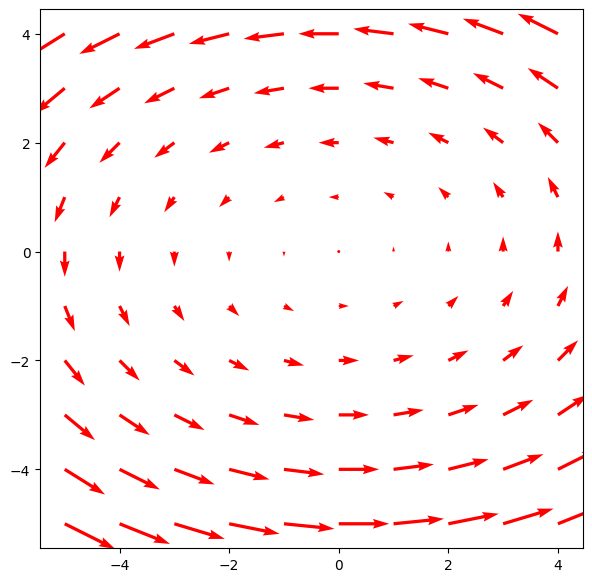

In [38]:
def f(x, y):
    return (-2 * y, x)


plot_vector_field(f, -5, 5, -5, 5)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

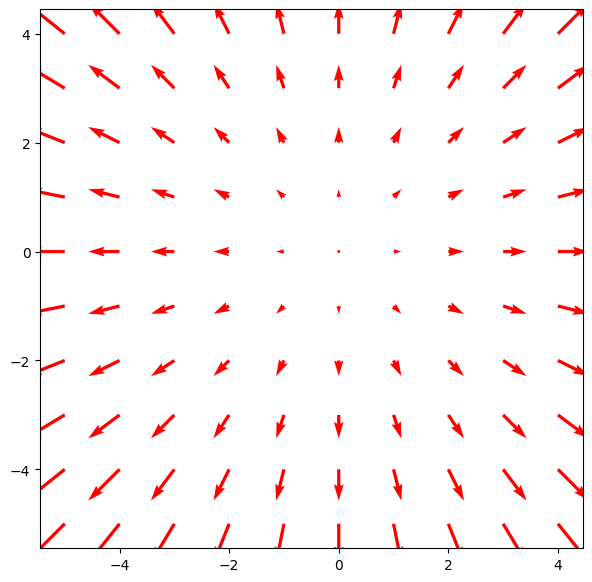

In [39]:
def u_1(x, y):
    return x, y

plot_vector_field(u_1, -5, 5, -5, 5)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

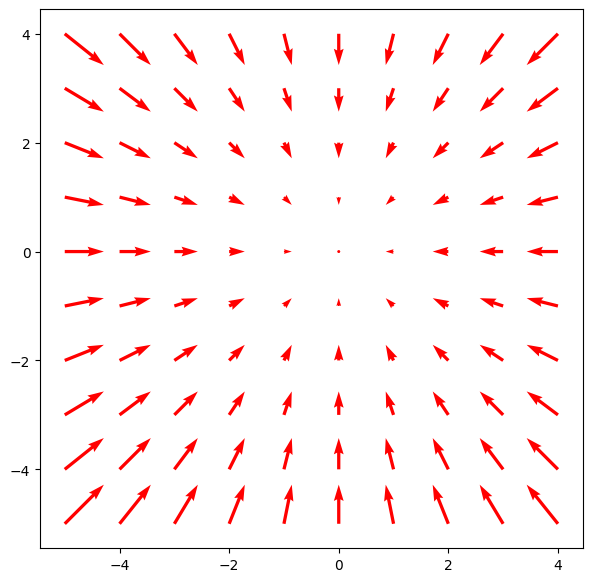

In [40]:
def black_hole_force(x, y):
    return -x, -y


plot_vector_field(black_hole_force, -5, 5, -5, 5)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

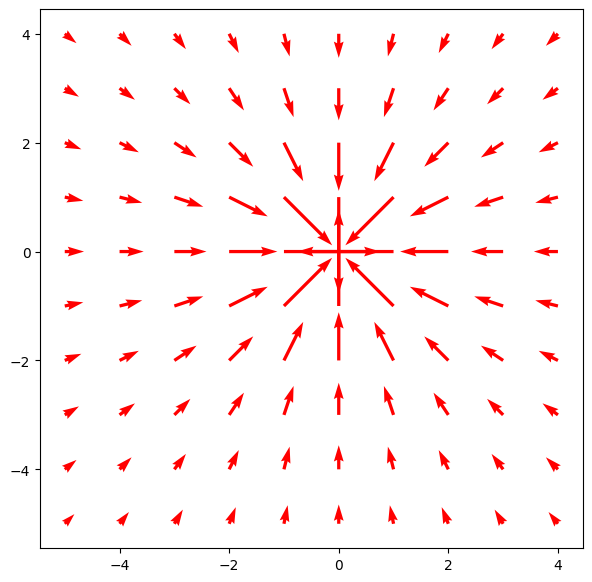

In [41]:
def black_hole_force(x, y):
    if x == 0 and y == 0:
        return 0, 0
    result_x = -x / (x ** 2 + y ** 2)
    result_y = -y / (x ** 2 + y ** 2)
    return result_x, result_y


plot_vector_field(black_hole_force, -5, 5, -5, 5)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

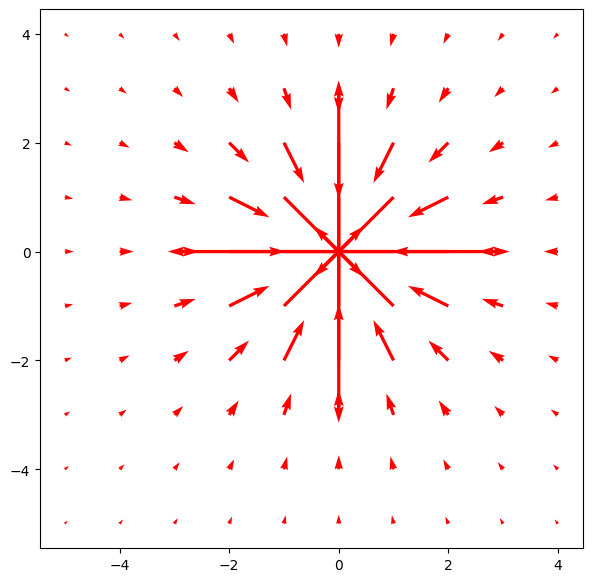

In [42]:
def improved_black_hole_force(x, y):
    if x == 0 and y == 0:
        return 0, 0

    distance = (x ** 2 + y ** 2) ** 0.5  # 计算欧几里得距离
    distance_cubed = distance ** 3  # 距离的立方

    # 根据实际引力公式 F = G*M*m/r^2，方向指向质量中心
    # 省略常数G、M和m，专注于随距离变化的部分
    force_magnitude = 1 / distance ** 2

    # 计算归一化的方向向量并乘以力的大小
    result_x = -x / distance * force_magnitude
    result_y = -y / distance * force_magnitude

    return result_x, result_y


plot_vector_field(improved_black_hole_force, -5, 5, -5, 5)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

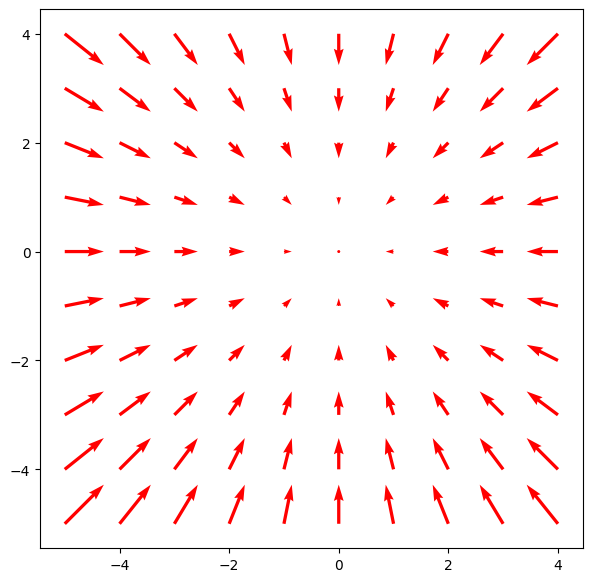

In [43]:
from py_lib import vectors


def gravitational_field(source, x, y):
    relative_position = (x - source.x, y - source.y)
    return vectors.scale(- source.gravity, relative_position)


class Plant:
    def __init__(self, x, y, gravity):
        self.x = x
        self.y = y
        self.gravity = gravity


def plant_gravitational_field(x, y):
    return gravitational_field(Plant(0, 0, 2), x, y)


plot_vector_field(plant_gravitational_field, -5, 5, -5, 5)

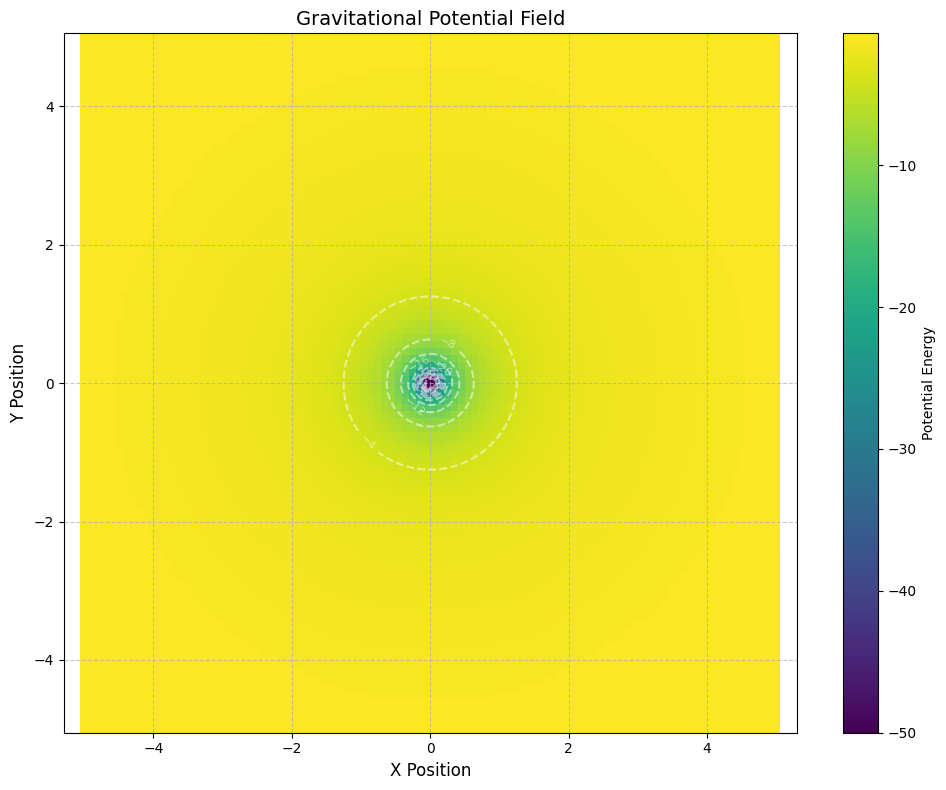

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 创建坐标网格 (Create coordinate grid)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 计算重力势能场 (Calculate gravitational potential field)
# 公式: U = -G * M / r，其中 r 是距离中心点的距离
# Formula: U = -G * M / r, where r is the distance from the center
G = 1  # 重力常数 (Gravitational constant)
M = 5  # 质量 (Mass)
R = np.sqrt(X**2 + Y**2)
# 避免除以零 (Avoid division by zero)
R[R < 0.1] = 0.1
# 计算势能 (Calculate potential)
U = -G * M / R

# 创建图形 (Create figure)
plt.figure(figsize=(10, 8))

# 绘制热力图 (Draw heatmap)
heatmap = plt.pcolormesh(X, Y, U, cmap=cm.viridis, shading='auto')
plt.colorbar(heatmap, label='Potential Energy')

# 添加等高线 (Add contour lines)
contours = plt.contour(X, Y, U, 15, colors='white', alpha=0.5)
plt.clabel(contours, inline=True, fontsize=8)

# 设置图表标题和标签 (Set chart title and labels)
plt.title('Gravitational Potential Field', fontsize=14)
plt.xlabel('X Position', fontsize=12)
plt.ylabel('Y Position', fontsize=12)

# 设置坐标轴范围 (Set axis ranges)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# 添加网格 (Add grid)
plt.grid(True, linestyle='--', alpha=0.7)

# 保持坐标轴比例相等 (Keep axis ratio equal)
plt.axis('equal')

# 显示图表 (Show the chart)
plt.tight_layout()
plt.show()

(<Figure size 700x700 with 1 Axes>, <Axes: >)

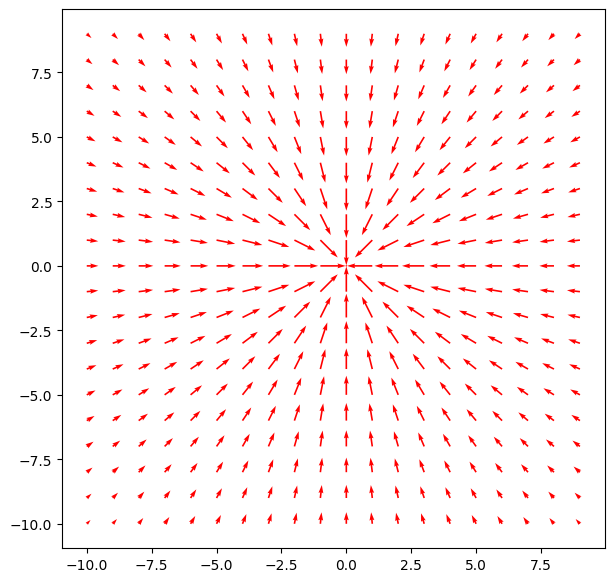

In [45]:
def calculate_gravity_vector(x, y, min_gravity=0.01, max_gravity=0.05):
    """
    计算指向中心点(0,0)的引力向量
    Calculate a gravity vector pointing towards the center point (0,0)

    参数/Parameters:
    x, y: 当前位置坐标 (current position coordinates)
    min_gravity: 最小引力大小 (minimum gravity magnitude)
    max_gravity: 最大引力大小 (maximum gravity magnitude)

    返回/Returns:
    gx, gy: 引力向量的x和y分量 (x and y components of gravity vector)
    """
    # 计算到中心点的距离 / Calculate distance to center
    distance = np.sqrt(x ** 2 + y ** 2)

    # 防止除以零 / Prevent division by zero
    if distance < 1e-10:
        return 0, 0

    # 归一化方向向量（指向中心） / Normalize direction vector (towards center)
    direction_x = -x / distance  # 负号表示指向中心 / Negative sign means towards center
    direction_y = -y / distance

    # 计算引力大小，距离越近引力越大 / Calculate gravity magnitude, closer = stronger
    # 将距离映射到 [0, 1] 范围 / Map distance to [0, 1] range
    max_possible_distance = np.sqrt(10 ** 2 + 10 ** 2)  # 约为14.14 / Approximately 14.14
    normalized_distance = 1 - (distance / max_possible_distance)

    # 线性插值计算引力大小 / Linear interpolation for gravity magnitude
    magnitude = min_gravity + normalized_distance * (max_gravity - min_gravity)

    # 计算引力向量分量 / Calculate gravity vector components
    gravity_x = direction_x * magnitude
    gravity_y = direction_y * magnitude

    return gravity_x, gravity_y

plot_vector_field(calculate_gravity_vector, -10, 10, -10, 10)

In [46]:
def plot_point(x, y, size=100, color='blue', alpha=1.0, marker='o',
               show_grid=False, title=None, xlabel=None, ylabel=None, xlim=None, ylim=None,
               ax=None, fig=None):
    """
    在二维平面绘制一个点，可选择在现有图形上绘制
    Draw a point on a 2D plane, optionally on an existing plot

    参数 (Parameters):
        x: float - 点的x坐标 (x-coordinate of the point)
        y: float - 点的y坐标 (y-coordinate of the point)
        size: float - 点的大小，默认为100 (size of the point, default is 100)
        color: str/tuple - 点的颜色，可以是名称或RGB值，默认为蓝色
               (color of the point, can be a name or RGB value, default is blue)
        alpha: float - 点的透明度，范围0-1，默认为1.0
               (transparency of the point, range 0-1, default is 1.0)
        marker: str - 点的形状标记，默认为'o'圆形
                (shape marker of the point, default is 'o' for circle)
        show_grid: bool - 是否显示网格，默认为False (whether to show grid, default is False)
        title: str - 图表标题，默认为None (title of the plot, default is None)
        xlabel: str - x轴标签，默认为None (x-axis label, default is None)
        ylabel: str - y轴标签，默认为None (y-axis label, default is None)
        xlim: tuple - x轴范围，如(xmin, xmax)，默认为None
              (x-axis range, e.g. (xmin, xmax), default is None)
        ylim: tuple - y轴范围，如(ymin, ymax)，默认为None
              (y-axis range, e.g. (ymin, ymax), default is None)
        ax: matplotlib.axes.Axes - 现有的坐标轴对象，如果提供则在其上绘制点
            (existing axes object, if provided, the point will be drawn on it)
        fig: matplotlib.figure.Figure - 现有的图形对象
             (existing figure object)

    返回 (Returns):
        fig, ax: matplotlib的Figure和Axes对象，可用于进一步自定义
                (matplotlib's Figure and Axes objects for further customization)
    """
    # 检查是否提供了现有图形，如没有则创建新图形
    # Check if existing axes are provided, create new ones if not
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    elif fig is None:
        fig = plt.gcf()  # 获取当前图形 (Get current figure)

    # 绘制点 (Plot the point)
    ax.scatter(x, y, s=size, c=color, alpha=alpha, marker=marker)

    # 设置网格 (Set grid)
    if show_grid:
        ax.grid(True, linestyle='--', alpha=0.7)

    # 设置标题和坐标轴标签 (Set title and axis labels)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    # 设置坐标轴范围 (Set axis ranges)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

    # 刷新图形 (Refresh the figure)
    plt.draw()

    return fig, ax

(<Figure size 700x700 with 1 Axes>, <Axes: >)

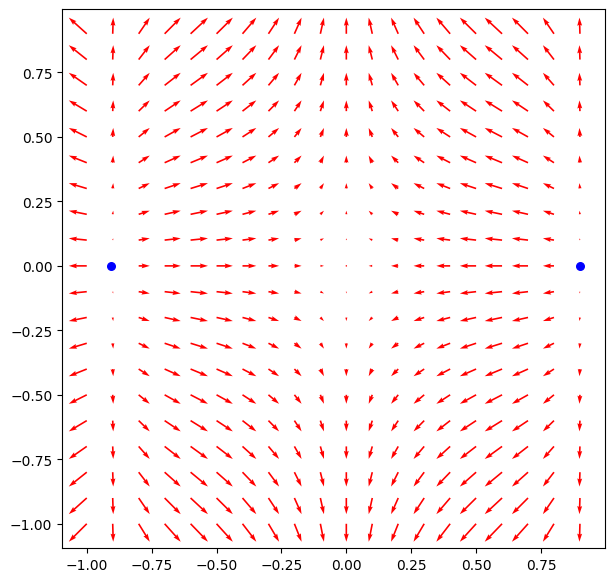

In [55]:
def u_2(x, y):
    return -4*x+6*(x**5), 2*y

fig, ax = plot_vector_field(u_2, -1, 1, -1, 1, xstep=0.1, ystep=0.1)
plot_point(-0.905, 0, size=30, color='blue', alpha=1.0, fig=fig, ax=ax)
plot_point(0.9, 0, size=30, color='blue', alpha=1.0, fig=fig, ax=ax)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

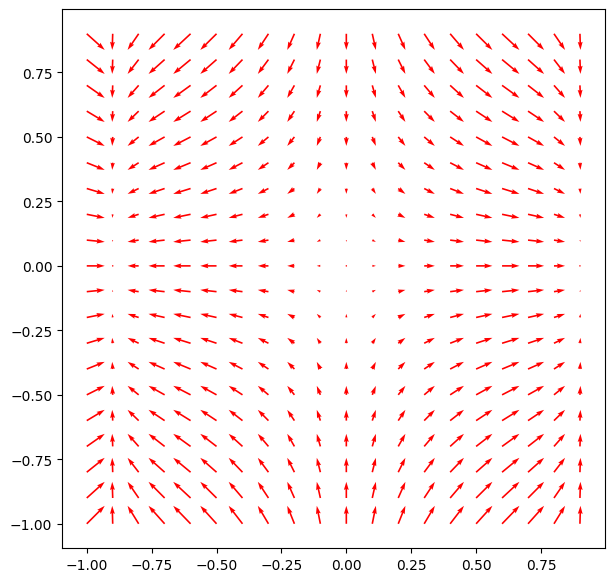

In [48]:
def u_2(x, y):
    return 4*x-6*(x**5), -2*y

plot_vector_field(u_2, -1, 1, -1, 1, xstep=0.1, ystep=0.1)